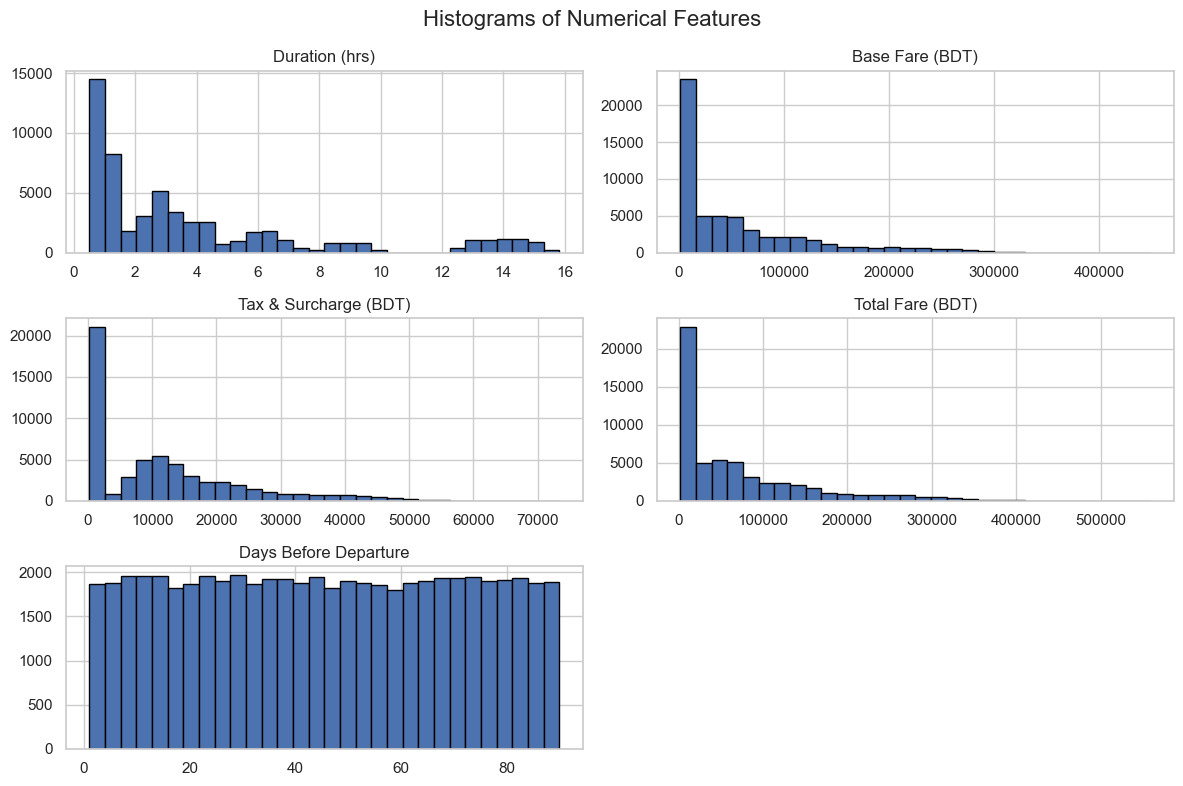

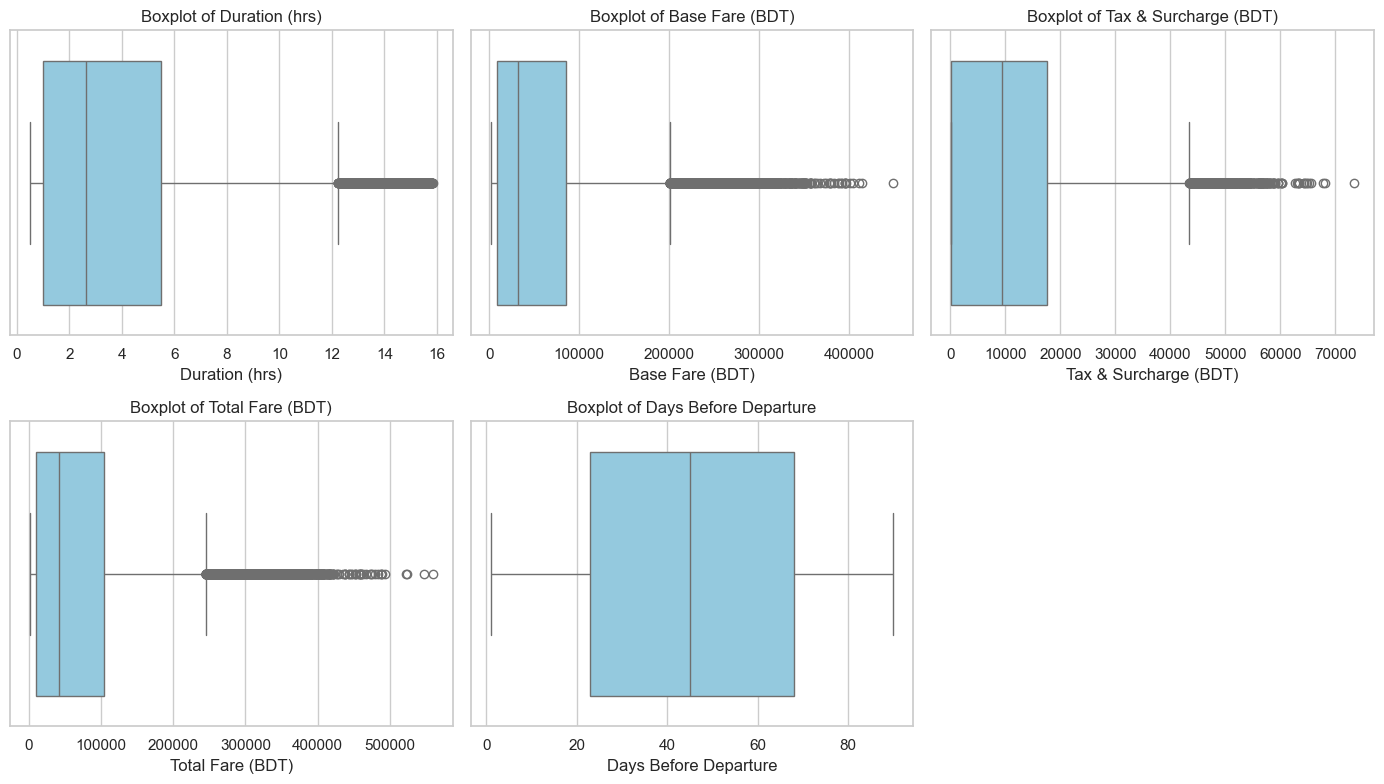

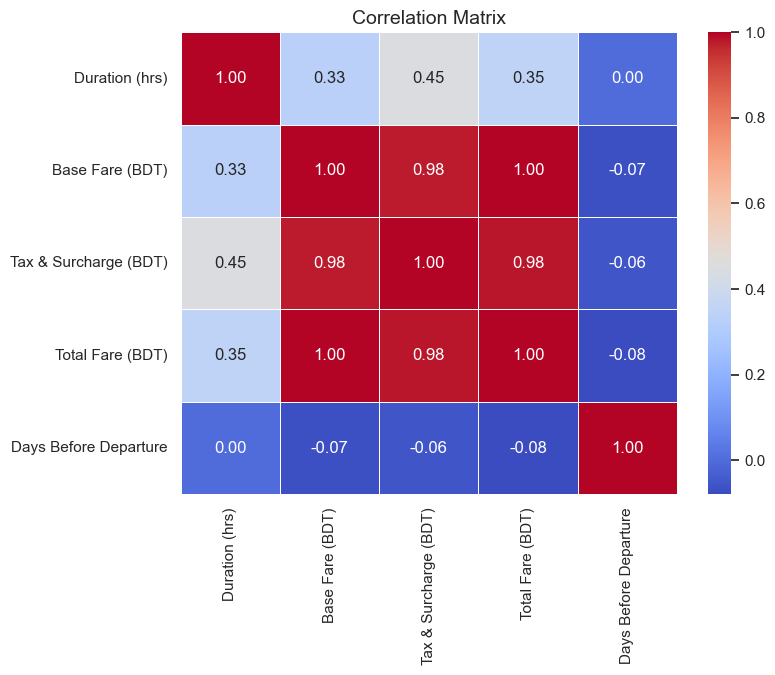

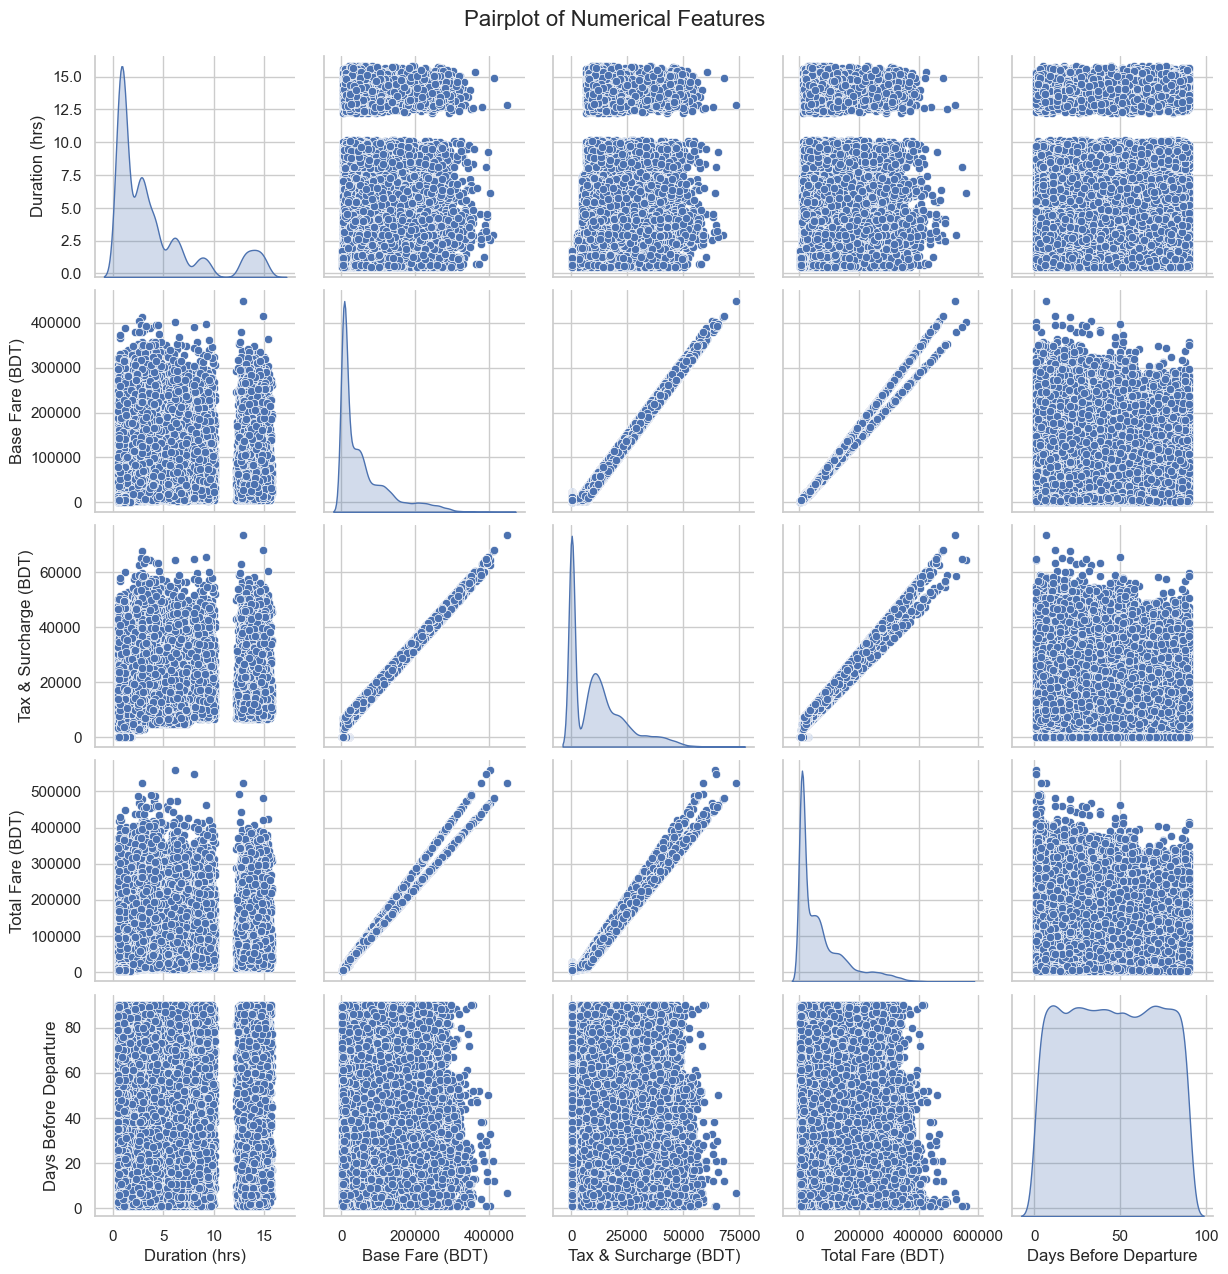

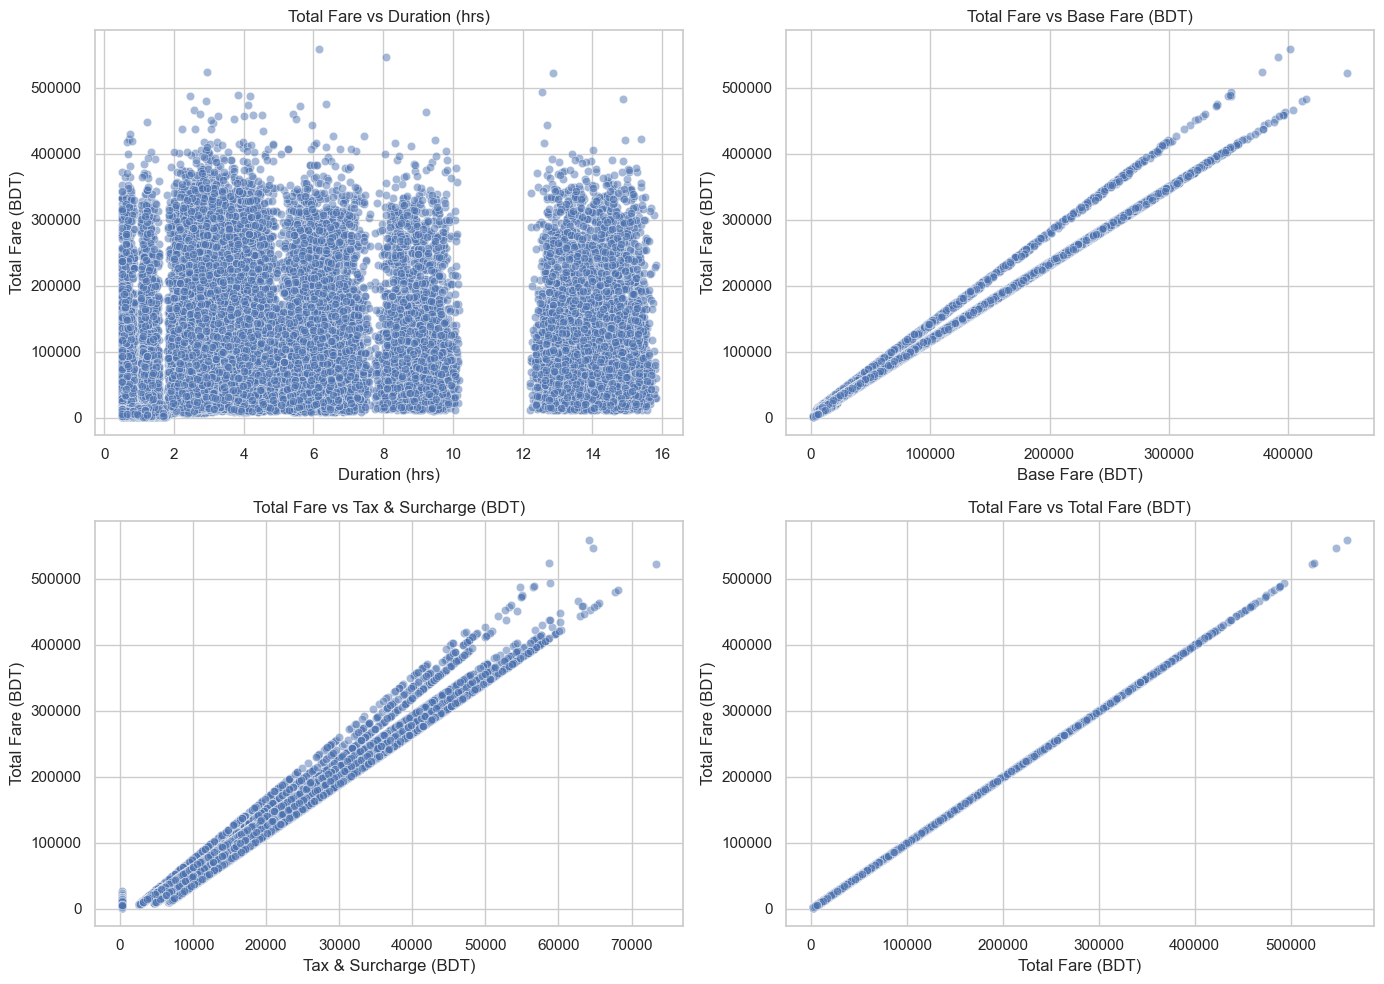

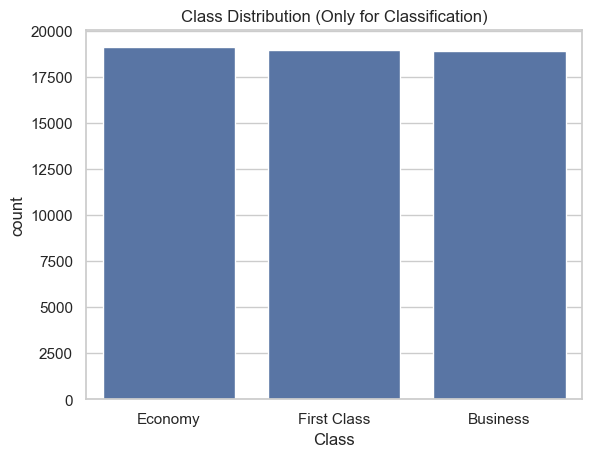

FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📌 Step 0: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plotting style
sns.set(style='whitegrid')
%matplotlib inline

# 📌 Step 1: Load the Dataset
df = pd.read_csv("Flight_Price_Dataset_of_Bangladesh.csv")

# 📌 Step 2: Analyze Feature Distributions
# Numerical columns
num_cols = ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 'Days Before Departure']

# Histograms
df[num_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 📌 Step 3: Correlation Analysis
# Compute correlation matrix
correlation = df[num_cols].corr()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# 📌 Step 4: Relationship with Target Variable (Total Fare)
# Pairplots
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)
plt.show()

# Scatter plots of predictors vs. target
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols[:-1], 1):  # excluding Total Fare
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Total Fare (BDT)', alpha=0.5)
    plt.title(f'Total Fare vs {col}')
plt.tight_layout()
plt.show()

# 📌 Step 5: Class Imbalance (only useful for classification)
# Since you're doing regression, we skip this
# But if you had a classification column like "Class", you could do:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Only for Classification)")
plt.show()



# Load your dataset (adjust the filename as needed)
df = pd.read_csv('your_dataset.csv')

# Check if 'Price' and numeric features exist
print(df.columns)

# Define your numeric features (example)
numeric_features = ['Feature1', 'Feature2', 'Feature3']  # replace with actual column names

# Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=numeric_features, hue='Price', palette='viridis')
plt.show()


# Scatterplot to understand relationship between 'Price' (target) and other predictors
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=numeric_features, hue='Price', palette='viridis')
plt.show()



# Load your dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\AI\.ipynb_checkpoints\Flight_Price_Dataset_of_Bangladesh.csv')

# -----------------------------

from sklearn.model_selection import train_test_split

# 1. Separate features and target
X = df.drop('Total Fare (BDT)', axis=1)
y = df['Total Fare (BDT)']

# 2. First split: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Second split: validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Import all required regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost
from xgboost import XGBRegressor








In [49]:
# Step 2: Encode Categorical Variables
# -----------------------------
label_cols = ['Stopovers', 'Class', 'Seasonality']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for other categorical columns
one_hot_cols = ['Airline', 'Source', 'Destination', 'Aircraft Type', 'Booking Source']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Drop non-useful or textual columns
drop_cols = ['Source Name', 'Destination Name', 'Departure Date & Time', 'Arrival Date & Time']
df.drop(columns=drop_cols, inplace=True)

# -----------------------------

In [51]:
# Step 3: Standardize Numerical Features
# -----------------------------
scaler = StandardScaler()
num_cols = ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 
            'Total Fare (BDT)', 'Days Before Departure']
df[num_cols] = scaler.fit_transform(df[num_cols])

# -----------------------------

In [53]:
# Step 4: Detect and Handle Outliers (Z-score method)
# -----------------------------
z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())
df = df[(z_scores < 3).all(axis=1)]

# -----------------------------

In [55]:
# Step 5: Split Dataset into Train, Validation, and Test Sets
# -----------------------------
X = df.drop('Total Fare (BDT)', axis=1)
y = df['Total Fare (BDT)']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (39131, 62) (39131,)
Validation set: (8385, 62) (8385,)
Test set: (8386, 62) (8386,)


In [57]:
# Display the first few rows of the dataset
print(df.head())

   Duration (hrs)  Stopovers  Class  Base Fare (BDT)  Tax & Surcharge (BDT)  \
0       -0.677925          2      1        -0.548639              -0.517851   
1       -0.827140          2      2        -0.687016              -0.927748   
2       -0.318833          0      1        -0.276250               0.044055   
3       -0.808231          2      1        -0.791167              -0.927748   
4        2.457410          0      0         0.005001               0.283592   

   Total Fare (BDT)  Seasonality  Days Before Departure  Airline_Air Astra  \
0         -0.547025            2              -1.363060              False   
1         -0.724300            2              -1.209305              False   
2         -0.234387            3               1.442968              False   
3         -0.811984            2               0.405122              False   
4          0.037913            2               1.712039              False   

   Airline_Air India  ...  Destination_SIN  Destination_

In [59]:
# Summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 55902 entries, 0 to 56999
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Duration (hrs)                     55902 non-null  float64
 1   Stopovers                          55902 non-null  int32  
 2   Class                              55902 non-null  int32  
 3   Base Fare (BDT)                    55902 non-null  float64
 4   Tax & Surcharge (BDT)              55902 non-null  float64
 5   Total Fare (BDT)                   55902 non-null  float64
 6   Seasonality                        55902 non-null  int32  
 7   Days Before Departure              55902 non-null  float64
 8   Airline_Air Astra                  55902 non-null  bool   
 9   Airline_Air India                  55902 non-null  bool   
 10  Airline_AirAsia                    55902 non-null  bool   
 11  Airline_Biman Bangladesh Airlines  55902 non-null  bool   


In [61]:
# Missing values analysis
print(df.isnull().sum())

Duration (hrs)                   0
Stopovers                        0
Class                            0
Base Fare (BDT)                  0
Tax & Surcharge (BDT)            0
                                ..
Aircraft Type_Boeing 737         0
Aircraft Type_Boeing 777         0
Aircraft Type_Boeing 787         0
Booking Source_Online Website    0
Booking Source_Travel Agency     0
Length: 63, dtype: int64


In [ ]:
# Visualizing feature distributions (Histograms)
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

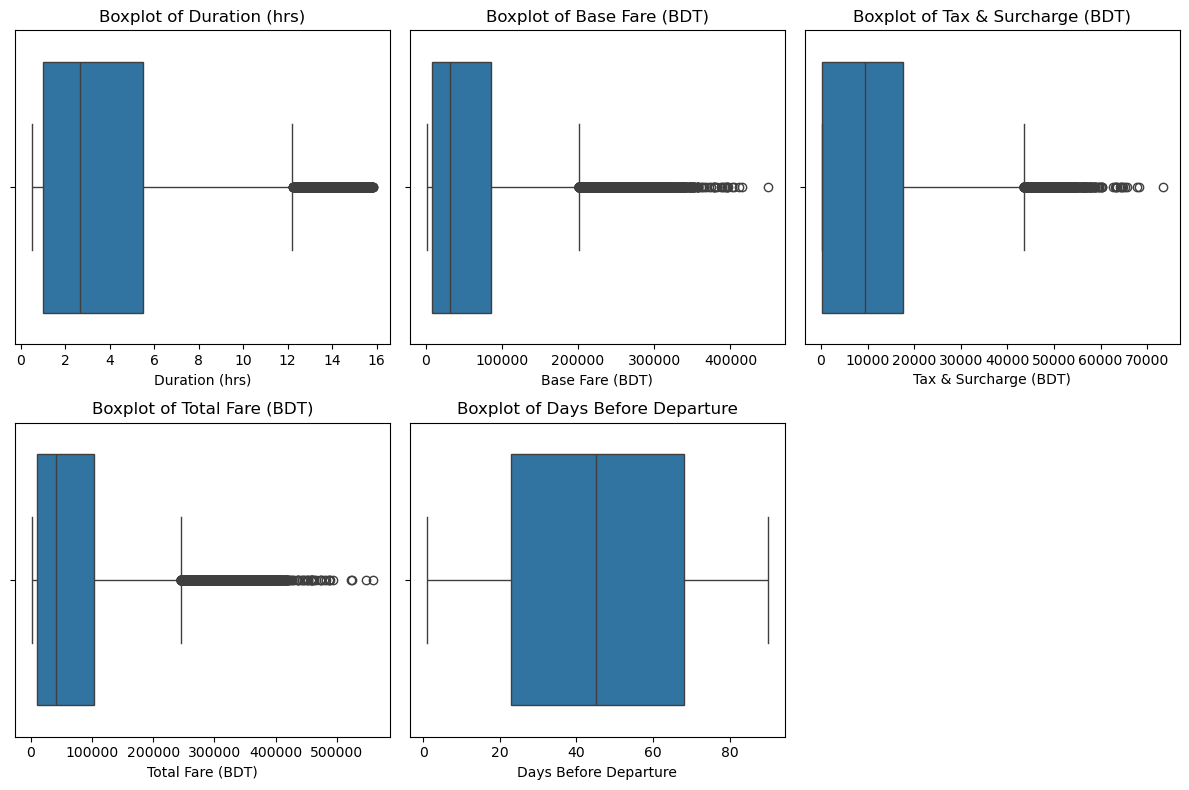

In [79]:
# Boxplot for feature distributions (useful for detecting outliers)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

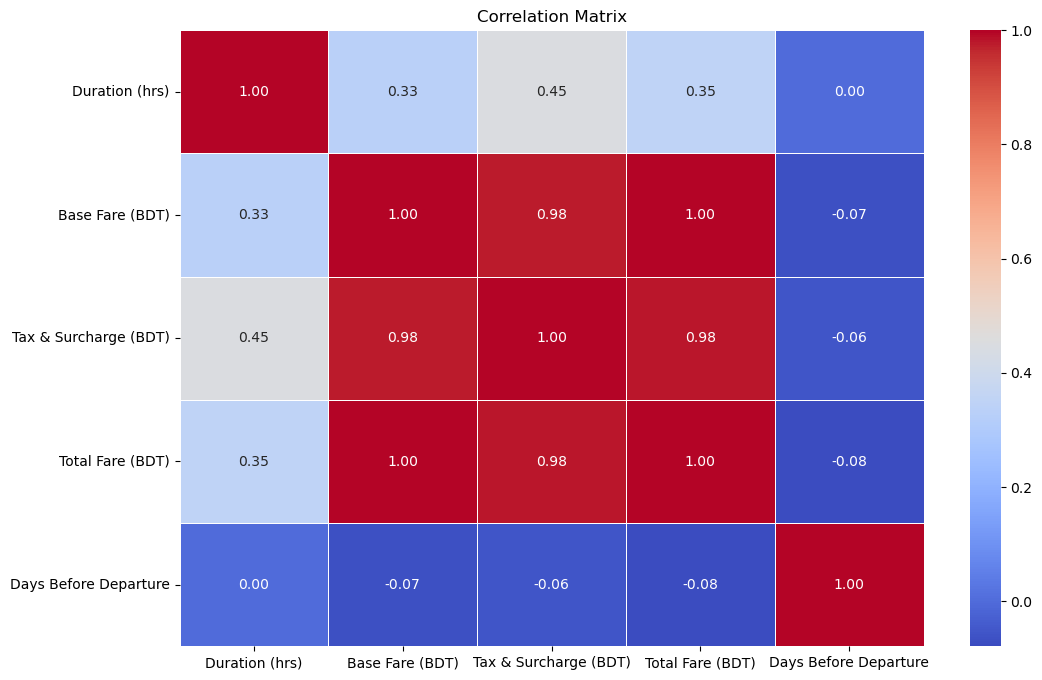

In [105]:
# Correlation matrix and heatmap
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Scatterplot to understand relationship between 'Price' (target) and other predictors
# plt.figure(figsize=(12, 8))
# sns.pairplot(df, vars=numeric_features, hue='Price', palette='viridis')
# plt.show()

In [17]:
# If 'Price' is a continuous variable, we check the distribution of 'Price'
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Price'], kde=True, color='blue')
# plt.title('Distribution of Flight Prices')
# plt.show()

In [113]:
# If there is a classification task (like predicting price categories), check for class imbalance
# Assuming 'Price_Category' as the target variable for classification
# if 'Price_Category' in df.columns:
#     sns.countplot(x='Price_Category', data=df)
#     plt.title('Class Distribution for Price Category')
#     plt.show()

In [ ]:
# Encode categorical variables (if any) before building models
# Assuming 'Category' is a categorical column
# if 'Category' in df.columns:
#     label_encoder = LabelEncoder()
#     df['Category'] = label_encoder.fit_transform(df['Category'])

In [29]:
# Checking for class imbalance in categorical columns
# categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
# for column in categorical_columns:
#     print(f"Class distribution for {column}:")
#     print(df[column].value_counts())
#     sns.countplot(x=column, data=df)
#     plt.title(f'Class distribution of {column}')
#     plt.show()

In [33]:
# Numerical columns
num_cols = ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 'Days Before Departure']

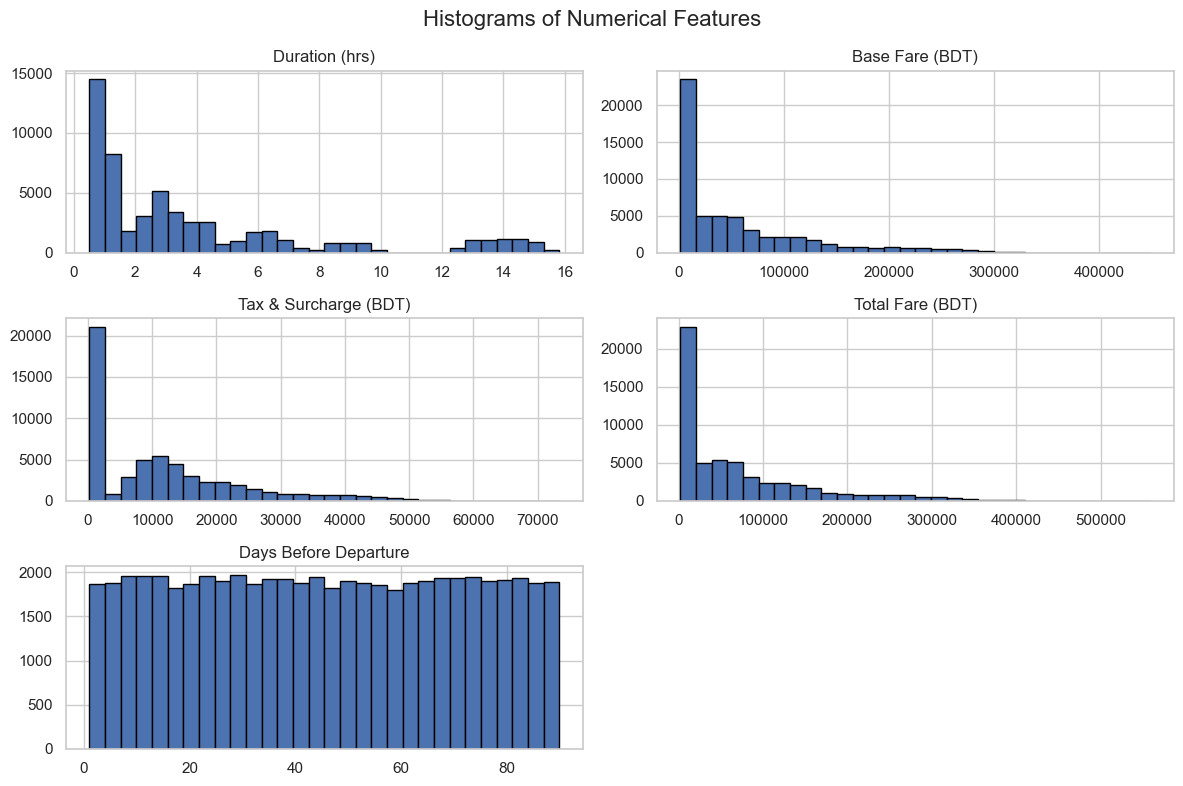

In [35]:
# Histograms
df[num_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

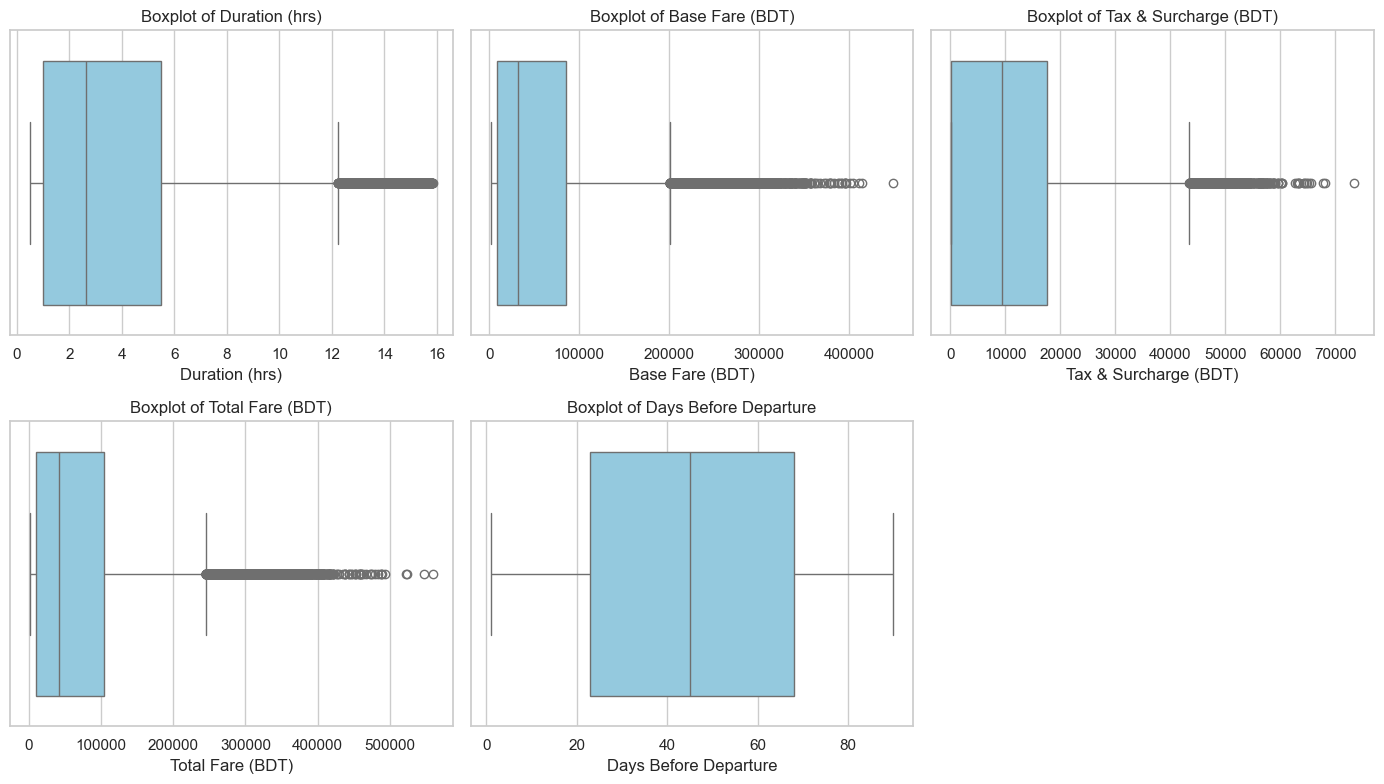

In [37]:
# Boxplots for outlier detection
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [41]:
# 📌 Step 3: Correlation Analysis
# Compute correlation matrix
correlation = df[num_cols].corr()

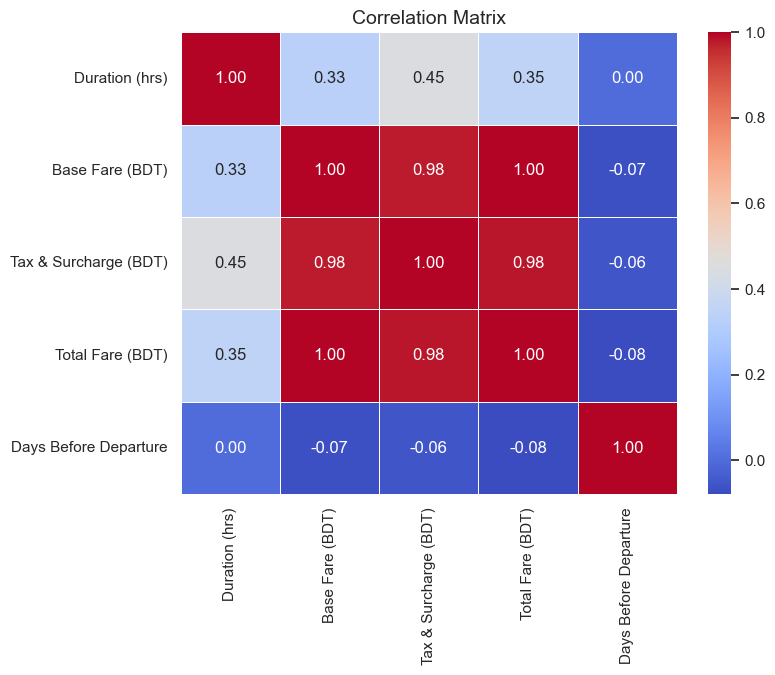

In [43]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

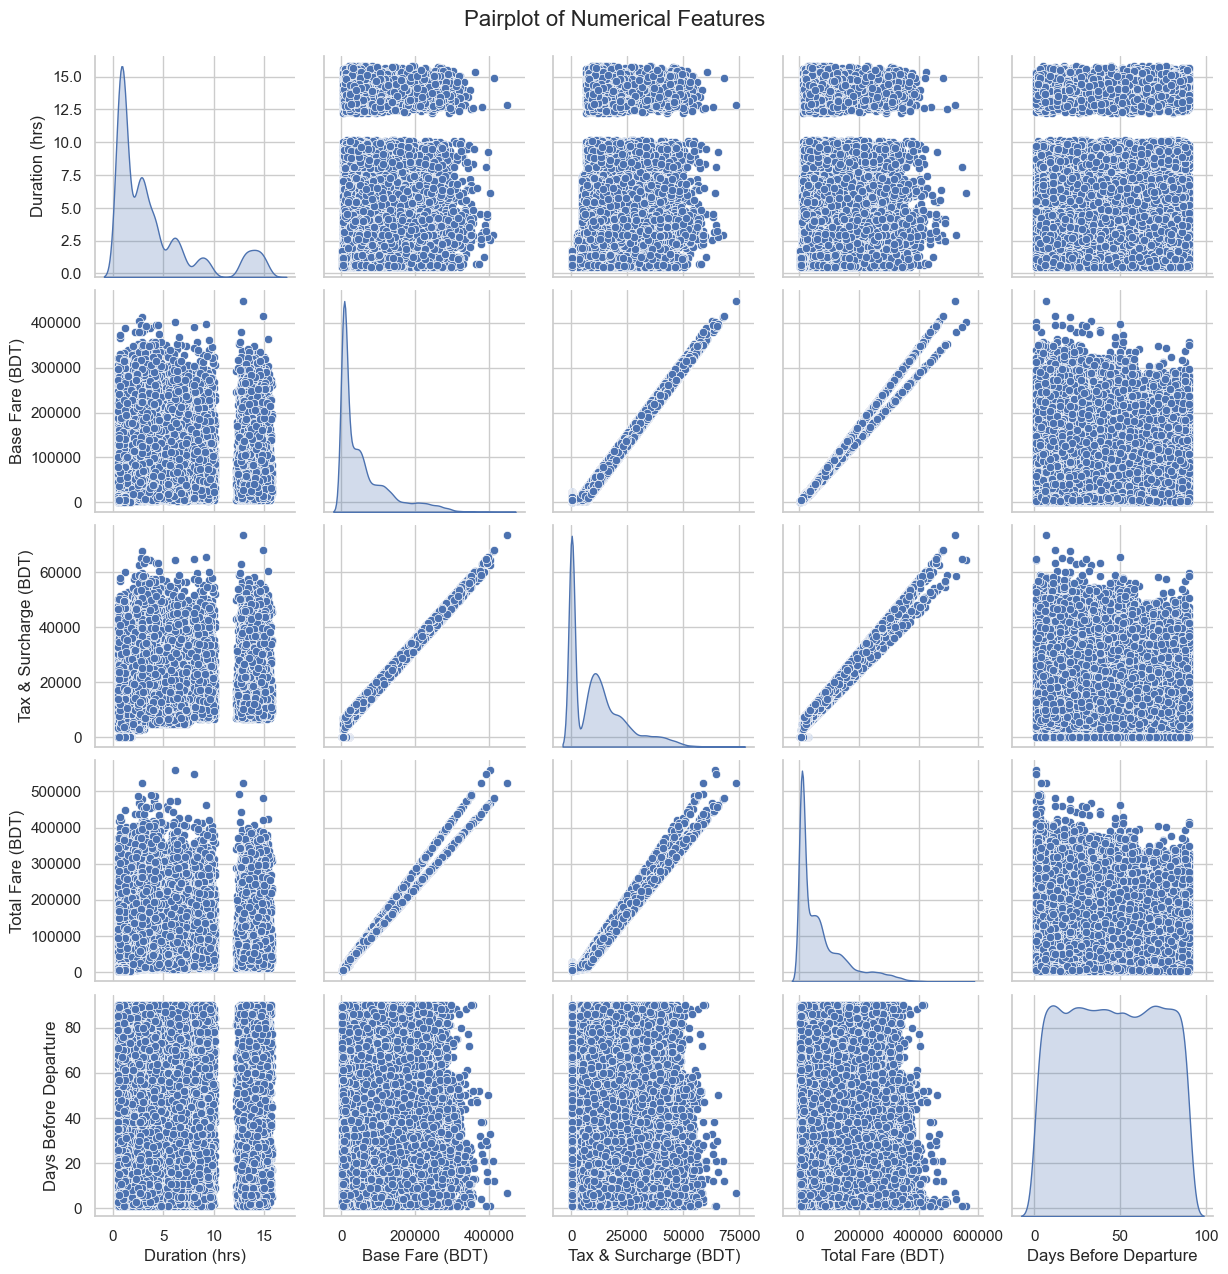

In [46]:
# 📌 Step 4: Relationship with Target Variable (Total Fare)
# Pairplots
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)
plt.show()

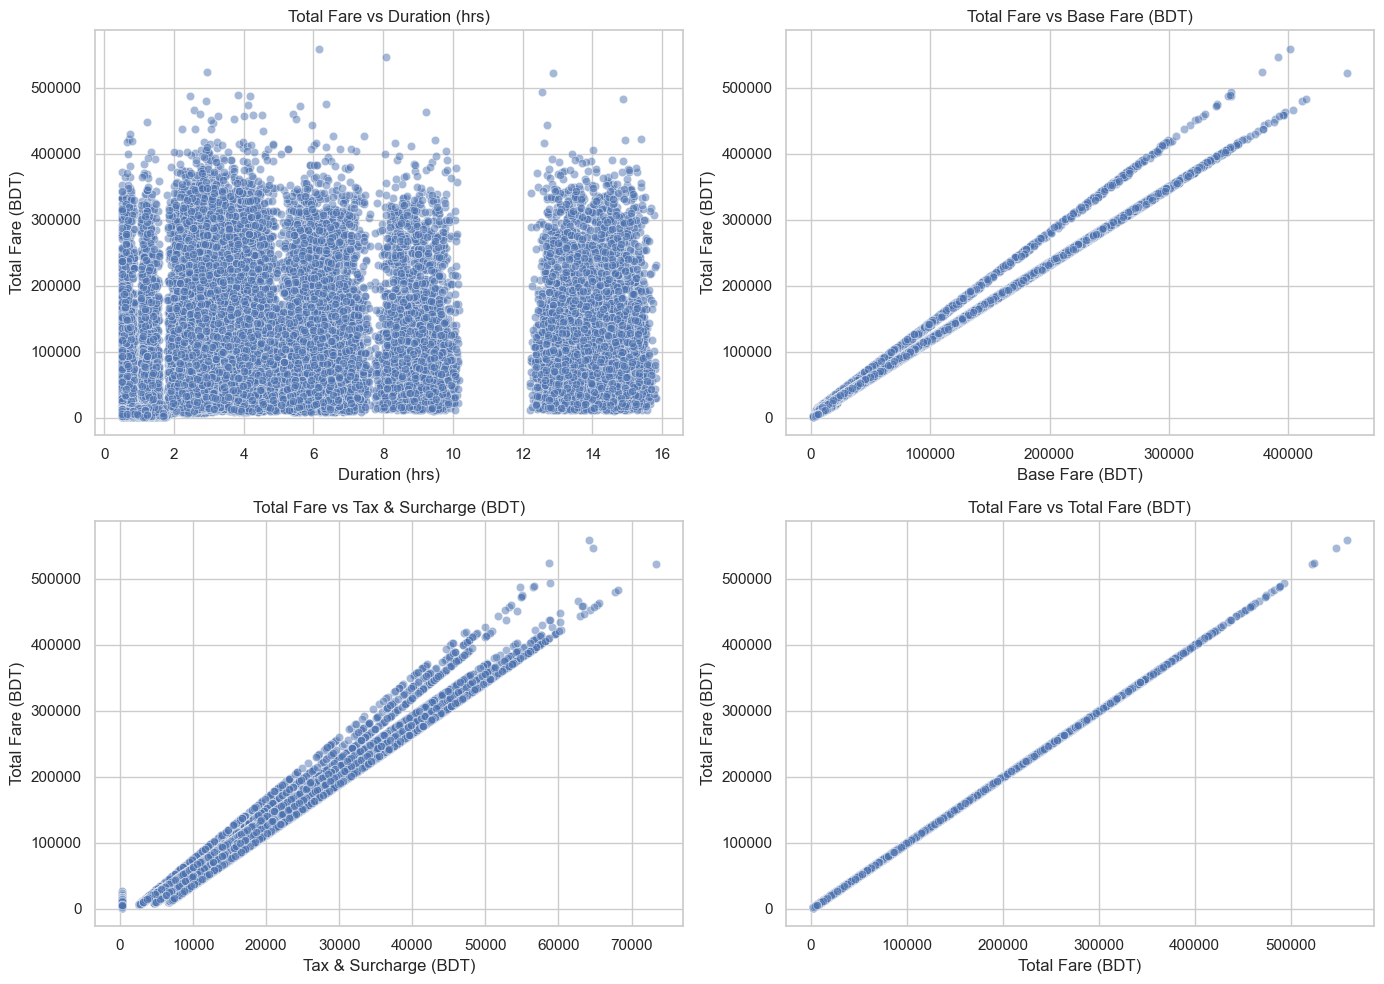

In [48]:
# Scatter plots of predictors vs. target
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols[:-1], 1):  # excluding Total Fare
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Total Fare (BDT)', alpha=0.5)
    plt.title(f'Total Fare vs {col}')
plt.tight_layout()
plt.show()

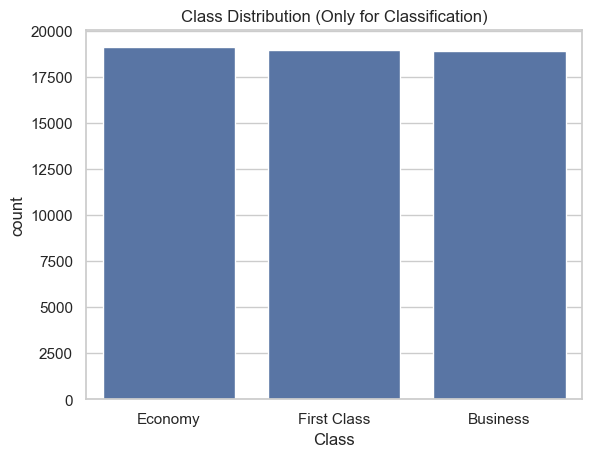

In [50]:
# 📌 Step 5: Class Imbalance (only useful for classification)
# Since you're doing regression, we skip this
# But if you had a classification column like "Class", you could do:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Only for Classification)")
plt.show()

In [1]:
# Define a dictionary of models
# models = {
#     "Linear Regression": LinearRegression(),
#     "KNN": KNeighborsRegressor(n_neighbors=5),
#     "SVM": SVR(kernel='rbf'),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# }

In [ ]:
# Create fare classes: Low, Medium, High
df['Fare_Class'] = pd.qcut(df['Total Fare (BDT)'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

# Check distribution
df['Fare_Class'].value_counts()


In [ ]:
# Drop target column and use 'Fare_Class' as new target
X = df.drop(['Total Fare (BDT)', 'Fare_Class'], axis=1)
y = df['Fare_Class']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# 1. Binning Total Fare into 3 classes: Low, Medium, High
df['Fare_Class'] = pd.qcut(df['Total Fare (BDT)'], q=3, labels=['Low', 'Medium', 'High'])

# 2. Prepare features and target
X = df.drop(['Total Fare (BDT)', 'Fare_Class'], axis=1)
y = df['Fare_Class']

# 3. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 4. Train-test split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# 6. Predict on test data
y_pred = log_reg.predict(X_test)

# 7. Show results
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fare Classification')
plt.show()


In [40]:
# # This line prints the confusion matrix
# print("📊 Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # This line prints precision, recall, f1-score, and accuracy for each class
# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred))

# from sklearn.linear_model import LogisticRegression

# # Create the model
# log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# # Fit the model on training data
# log_reg.fit(X_train, y_train)

# # Predict on test data
# y_pred = log_reg.predict(X_test)

# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# # Confusion Matrix
# print("📊 Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Classification Report
# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred))

# # Optional: Overall Accuracy
# print("\n✅ Overall Accuracy:", accuracy_score(y_test, y_pred))

# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Fare Classification')
# plt.show()



In [5]:
# SVM (SUPPORT VECTOR MACHINE)
# # 5. Encode categorical features
# label_encoders = {}
# for col in df.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le


# Let's predict the Class of flight as an example
# Prepare the features and target
# categorical_features = [
#     'Airline', 'Source', 'Source Name', 'Destination', 
#     'Destination Name', 'Stopovers', 'Aircraft Type', 
#     'Booking Source', 'Seasonality'
# ]

# numerical_features = [
#     'Duration (hrs)', 'Base Fare (BDT)', 
#     'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 
#     'Days Before Departure'
# ]



In [20]:
# Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

In [18]:
# Prepare target variable (Class prediction)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['Class'])

In [16]:
# Prepare feature matrix
# X = df[numerical_features + categorical_features]